In [1]:
import sys

sys.path.insert(0, '../..')

from synanno.backend.data_generator import (
    select_random_instances,
    connect_to_cloudvolumes,
    download_subvolumes,
    cloudvolume_metadata,
    visualize_data,
)

LOCAL_EXECUTION = True

/Users/lando/.local/share/virtualenvs/SynAnno-5CJocNL2/lib/python3.9/site-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [2]:
n_instances = 10  # Replace with desired number of instances
bucket_secret = "/Users/lando/.cloudvolume/secrets/google-secret.json"
materialization = "/Users/lando/Code/SynAnno/h01/synapse-export_000000000000.csv"
source_url = "gs://h01-release/data/20210601/4nm_raw"
target_url = "gs://h01-release/data/20210729/c3/synapses/whole_ei_onlyvol"
local_dir = "/Users/lando/Code/SynAnno/synanno/static/Images/data"  # Replace with desired local directory

In [3]:
random_instance_keys, bbox_dict = select_random_instances(
        n_instances, materialization
    )
source_cv, target_cv = connect_to_cloudvolumes(
    source_url, target_url, bucket_secret
)

print(source_cv.info)
print(target_cv.info)

vol_dim, vol_dim_scaled, scale = cloudvolume_metadata(
    source_cv, target_cv, ["x", "y", "z"], ["4", "4", "33"], ["8", "8", "33"]
)

print(vol_dim, vol_dim_scaled, scale)

{'@type': 'neuroglancer_multiscale_volume', 'data_type': 'uint8', 'num_channels': 1, 'scales': [{'chunk_sizes': [[128, 128, 16]], 'encoding': 'jpeg', 'key': '4.0x4.0x33.0', 'resolution': [4, 4, 33], 'sharding': {'@type': 'neuroglancer_uint64_sharded_v1', 'hash': 'identity', 'minishard_bits': 6, 'minishard_index_encoding': 'gzip', 'preshift_bits': 9, 'shard_bits': 20}, 'size': [1031784, 712800, 5293]}, {'chunk_sizes': [[128, 128, 32]], 'encoding': 'jpeg', 'key': '8.0x8.0x33.0', 'resolution': [8, 8, 33], 'sharding': {'@type': 'neuroglancer_uint64_sharded_v1', 'hash': 'identity', 'minishard_bits': 6, 'minishard_index_encoding': 'gzip', 'preshift_bits': 9, 'shard_bits': 17}, 'size': [515892, 356400, 5293]}, {'chunk_sizes': [[128, 128, 64]], 'encoding': 'jpeg', 'key': '16.0x16.0x33.0', 'resolution': [16, 16, 33], 'sharding': {'@type': 'neuroglancer_uint64_sharded_v1', 'hash': 'identity', 'minishard_bits': 6, 'minishard_index_encoding': 'gzip', 'preshift_bits': 9, 'shard_bits': 14}, 'size': 

In [4]:
download_subvolumes(
        random_instance_keys,
        source_cv,
        target_cv,
        local_dir,
        bbox_dict,
        ['x', 'y', 'z'],
        {"crop_size_x": 128, "crop_size_y": 128, "crop_size_z": 16},
        {c: v for c,v in zip(['x', 'y', 'z'], vol_dim) },
        scale
    )

Decompressing: 100%|██████████| 3/3 [00:00<00:00, 24151.46it/s]


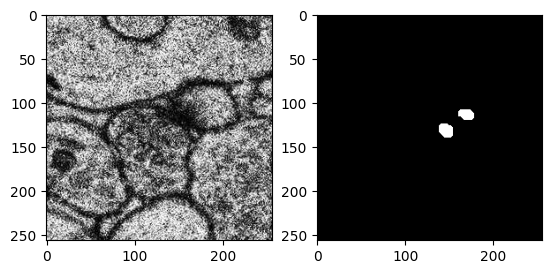

In [7]:
visualize_data('/Users/lando/Code/SynAnno/synanno/static/Images/data/source/source_47672.npy', slice=10)